# AMATH 515 Homework 1

**Due Date: 01/25/2024**

*Homework Instruction*: Please fill in the gaps in this template where commented as `TODO`. When submitting, make sure your file is still named `515Hw1_Coding.ipynb` -- that's what Gradescope will be looking for. There is no need to submit `hw1_supp.py`, it will already be on the server when you submit your work. You'll have **10 attempts** to pass the tests. 

In [199]:
# require numpy module
import numpy as np
from numpy.linalg import norm
from numpy.linalg import solve
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from matplotlib.patches import Ellipse
import matplotlib

In [200]:
# import supplementary functions for Homework 1
import sys

sys.path.insert(0, './')
from hw1_supp import *
# import matplotlib

# matplotlib.use('AGG')
# Have to manually set barebones backend or else autograder is mad


In [201]:
# You can change this seed if you want to test that your program works with different random data,
# but please set it back to 123 when you submit your work.
seed = 123

## Gradient Descent Solver

Recall the gradient descent algorithm we learned in class and complete the gradient descent solver.

In [202]:
def optimizeWithGD(x0, func, grad, step_size=None, tol=1e-6, max_iter=1000, use_line_search=True):
    """
    Optimize with Gradient Descent
    
    input
    -----
    x0 : array_like
        Starting point for the solver.
    func : function
        Takes x and return the function value.
    grad : function
        Takes x and returns the gradient of "func".
    step_size : float or None
        If it is a float number and `use_line_search=False`, it will be used as the step size.
        Otherwise, line search will be used
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iterations for terminating the solver.
    use_line_search : bool, optional
        When it is true a line search will be used, otherwise `step_size` has to be provided.
        
    output
    ------
    x : array_like
        Final solution
    obj_his : array_like
        Objective function's values convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, line search fail
        3, other
    """
    # safeguard
    if not use_line_search and step_size is None:
        print('Please specify the step_size or use the line search.')
        return x0, np.array([]), np.array([]), 3

    # initial step
    x = np.copy(x0)
    g = grad(x)
    #
    obj = func(x)
    err = norm(g)
    #
    obj_his = np.zeros(max_iter + 1)
    err_his = np.zeros(max_iter + 1)
    #
    obj_his[0] = obj
    err_his[0] = err

    # start iterations
    iter_count = 0
    while err >= tol:
        if use_line_search:
            step_size = lineSearch(x, g, g, func)
        #
        # if line search fail step_size will be None
        if step_size is None:
            print('Gradient descent line search fail.')
            return x, obj_his[:iter_count + 1], err_his[:iter_count + 1], 2
        #
        # gradient descent step
        #####
        # TODO: with given step_size, complete gradient descent step
        x -= step_size * g
        #####
        #
        # update function and gradient
        g = grad(x)
        #
        obj = func(x)
        err = norm(g)
        #
        iter_count += 1
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if exceed maximum number of iteration
        if iter_count >= max_iter:
            print('Gradient descent reach maximum number of iteration.')
            return x, obj_his[:iter_count + 1], err_his[:iter_count + 1], 1
    #
    return x, obj_his[:iter_count + 1], err_his[:iter_count + 1], 0

## Newton's Solver

Recall Newton method we learned from in class and complete Newton solver.

In [203]:
def optimizeWithNT(x0, func, grad, hess, tol=1e-6, max_iter=100):
    """
    Optimize with Newton's Method
    
    input
    -----
    x0 : array_like
        Starting point for the solver.
    func : function
        Takes x and return the function value.
    grad : function
        Takes x and return the gradient.
    hess : function
        Input x and return the Hessian matrix.
    tol : float, optional
        Gradient tolerance for terminating the solver.
    max_iter : int, optional
        Maximum number of iteration for terminating the solver.
        
    output
    ------
    x : array_like
        Final solution
    obj_his : array_like
        Objective function value convergence history
    err_his : array_like
        Norm of gradient convergence history
    exit_flag : int
        0, norm of gradient below `tol`
        1, exceed maximum number of iteration
        2, others
    """
    # initial step
    x = np.copy(x0)
    g = grad(x)
    H = hess(x)
    #
    obj = func(x)
    err = norm(g)
    #
    obj_his = np.zeros(max_iter + 1)
    err_his = np.zeros(max_iter + 1)
    #
    obj_his[0] = obj
    err_his[0] = err

    # start iterations
    iter_count = 0
    while err >= tol:
        # Newton step
        #####
        # TODO: complete Newton step
        x -= LA.inv(H) @ g
        #####
        #
        # update function, gradient and Hessian
        g = grad(x)
        H = hess(x)
        #
        obj = func(x)
        err = norm(g)
        #
        iter_count += 1
        obj_his[iter_count] = obj
        err_his[iter_count] = err
        #
        # check if we exceeded maximum number of iterations
        if iter_count >= max_iter:
            print('Gradient descent reach maximum number of iteration.')
            return x, obj_his[:iter_count + 1], err_his[:iter_count + 1], 1
    #
    return x, obj_his[:iter_count + 1], err_his[:iter_count + 1], 0

## Simple Test

Consider a simple test problem,

$$
\min_x~~f(x) \triangleq \frac{1}{2} \|x - b\|^2
$$

We can easily calculate the gradient and Hessian of $f$,

$$
\nabla f(x) = x - b, \quad \nabla^2 f(x) = I
$$

where $I$ is an identity matrix, and we know that $x^* = b$ is the solution.

We will use this function as a simple test to check whether gradient descent and Newton method are implemented right.

In [204]:
# create b
b = np.array([1.0, 2.0, 3.0])


# define test function
def test_func(x):
    return 0.5 * sum((x - b) ** 2)


# define test gradient
def test_grad(x):
    return x - b


# define test Hessian
def test_hess(x):
    return np.eye(b.size)

In [205]:
# test gradient descent
x0_gd = np.zeros(b.size)
#
x_gd, obj_his_gd, err_his_gd, exit_flag_gd = optimizeWithGD(x0_gd, test_func, test_grad, 1.0)
# check if the solution is correct
err_gd = norm(x_gd - b)
#
print(x_gd, obj_his_gd[-1])
if err_gd < 1e-6:
    print('Gradient Descent: OK')
else:
    print('Gradient Descent: Err')

[1. 2. 3.] 0.0
Gradient Descent: OK


In [206]:
# test Newton's method
x0_nt = np.zeros(b.size)
#
x_nt, obj_his_nt, err_his_nt, exit_flag_nt = optimizeWithNT(x0_nt, test_func, test_grad, test_hess)
# check if the solution is correct
err_nt = norm(x_nt - b)
print(x_nt, obj_his_nt[-1])
#
if err_nt < 1e-6:
    print('Newton: OK')
else:
    print('Newton: Err')

[1. 2. 3.] 0.0
Newton: OK


## Logistic Regression

Recall the logistic regression model
$$
f(x) = \sum_{i=1}^m\left\{\log\left[1+\exp(\langle a_i,x\rangle)\right]-b_i\langle a_i,x\rangle\right\} + \frac{\lambda}{2}\|x\|^2.
$$

Calculate the gradient and Hessian of this function and define them below using the given data.

In [207]:
# fix a random seed
np.random.seed(seed)
# set dimensions and create some random data
m_lgt = 500
n_lgt = 50
A_lgt = 0.3 * np.random.randn(m_lgt, n_lgt)
x_lgt = np.random.randn(n_lgt)
b_lgt = sampleLGT(x_lgt, A_lgt)
lam_lgt = 0.1

### Define functions

In [208]:
# implement logistic function, gradient and Hessian
def lgt_func(x):
    #####
    # TODO: complete the function
    f = lam_lgt / 2 * LA.norm(x, 2) ** 2
    for i in range(m_lgt):
        a_i = A_lgt[i]
        b_i = b_lgt[i]
        f += np.log(1 + np.exp(a_i.T @ x))  ## the log term
        f -= b_i * a_i.T @ x  ## the inner product term
    #####
    return f


def sig(Ax_i):
    return np.exp(Ax_i) / (1 + np.exp(Ax_i))


#
def lgt_grad(x):
    #####
    # TODO: complete the gradient
    Ax = A_lgt @ x
    grad = -A_lgt.T @ b_lgt
    sigmas = np.zeros(len(Ax))
    for i in range(len(Ax)):
        sigmas[i] = sig(Ax[i])
    grad += A_lgt.T @ sigmas
    grad += lam_lgt * x
    #####
    return grad


#
def lgt_hess(x):
    #####
    # TODO: complete the Hessian
    H = lam_lgt * np.eye(n_lgt)
    Ax = A_lgt @ x
    sigmas = np.zeros([len(Ax), 1])
    for i in range(len(Ax)):
        sigmas[i] = sig(Ax[i])
    H_yy = np.diag(sigmas @ (np.ones([len(Ax), 1]) - sigmas).T)
    H_yy = np.diag(H_yy)
    H += A_lgt.T @ H_yy @ A_lgt

    #####
    return H

In [209]:
#==GRADED==#
# No need to change anything in this cell.
x_test = 3 * np.ones(n_lgt)
# We test the values of these functions at a sample point (3, 3, ..., 3)
lgt_func_test = lgt_func(x_test)
lgt_grad_test = lgt_grad(x_test)
lgt_hess_test = lgt_hess(x_test)

In [210]:
# uniform step size for gradient descent or should we use line search?
#####
# TODO: if there is a uniform stepsize, set up step_size_lgt =
# otherwise set use_line_search=True
#####

### Apply gradient descent solver

In [211]:
x0_lgt_gd = np.zeros(n_lgt)
#==GRADED==#
# No need to change anything in this cell.
x_lgt_gd, obj_his_lgt_gd, err_his_lgt_gd, exit_flag_lgt_gd = \
    optimizeWithGD(x0_lgt_gd, lgt_func, lgt_grad, None)

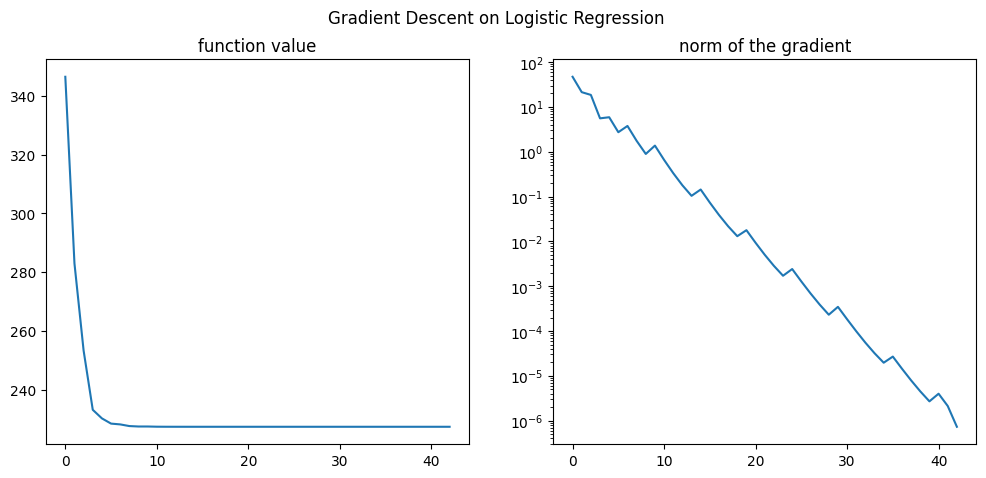

In [212]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(obj_his_lgt_gd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_gd)
ax[1].set_title('norm of the gradient')
fig.suptitle('Gradient Descent on Logistic Regression')
plt.show()

### Apply Newton's solver

In [213]:
x0_lgt_nt = np.zeros(n_lgt)
#==GRADED==#
# No need to change anything in this cell.
x_lgt_nt, obj_his_lgt_nt, err_his_lgt_nt, exit_flag_lgt_nt = \
    optimizeWithNT(x0_lgt_nt, lgt_func, lgt_grad, lgt_hess)

Solution difference 3.891333540922096e-07


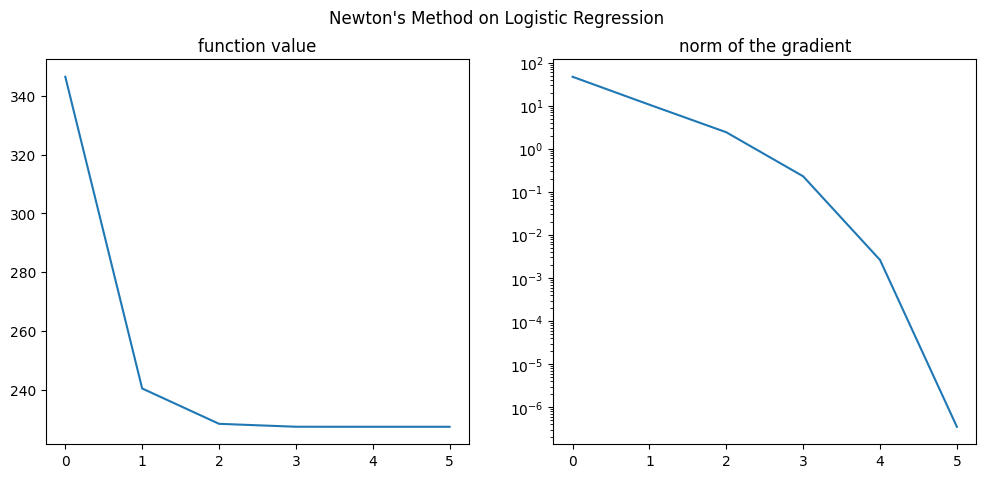

In [214]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(obj_his_lgt_nt)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_nt)
ax[1].set_title('norm of the gradient')
fig.suptitle('Newton\'s Method on Logistic Regression')
print("Solution difference", LA.norm(x_lgt_gd - x_lgt_nt, 2))

## Poisson Regression

Recall the Poisson regression model
$$
f(x)=\sum_{i=1}^m\left[\exp(\langle a_i,x\rangle)-b_i\langle a_i,x\rangle\right]+\frac{\lambda}{2}\|x\|^2
$$

Calculate the gradient and Hessian of this function and define them below using the given data.

In [215]:
# fix a random seed
np.random.seed(seed)
# set the dimensions and create some data
m_psn = 500
n_psn = 50
A_psn = 0.3 * np.random.randn(m_psn, n_psn)
x_psn = np.random.randn(n_psn)
b_psn = samplePSN(x_psn, A_psn)
lam_psn = 0.1

### Define functions

In [216]:
# define function, gradient and Hessian
def psn_func(x):
    #####
    # TODO: complete the function
    f = lam_psn / 2 * LA.norm(x, 2) ** 2
    for i in range(m_lgt):
        a_i = A_psn[i]
        b_i = b_psn[i]
        f += np.exp(a_i.T @ x)  ## the exp term
        f -= b_i * a_i.T @ x  ## the inner product term
    #####
    return f


#
def psn_grad(x):
    #####
    # TODO: complete the gradient
    Ax = A_psn @ x
    grad = -A_psn.T @ b_psn
    sigmas = np.zeros(len(Ax))
    for i in range(len(Ax)):
        sigmas[i] = np.exp(Ax[i])
    grad += A_psn.T @ sigmas
    grad += lam_psn * x
    #####
    return grad


#
def psn_hess(x):
    #####
    # TODO: complete the Hessian
    Ax = A_psn @ x
    grad = -A_psn.T @ b_psn
    sigmas = np.zeros(len(Ax))
    for i in range(len(Ax)):
        sigmas[i] = np.exp(Ax[i])
    H = lam_psn * np.eye(n_psn)
    H += A_psn.T @ np.diag(sigmas) @ A_psn

    #####
    return H

In [217]:
#==GRADED==#
# No need to change anything in this cell.
x_test = 2 * np.ones(n_psn)
psn_func_test = psn_func(x_test)
psn_grad_test = psn_grad(x_test)
psn_hess_test = psn_hess(x_test)

In [218]:
# uniform step size for gradient descent or should we use line search?
#####
# TODO: if there is a uniform stepsize, set up step_size_lgt = 
# otherwise set use_line_search=True
#####

### Apply gradient descent solver

In [219]:
x0_psn_gd = np.zeros(n_lgt)
#==GRADED==#
# No need to change anything in this cell.
x_psn_gd, obj_his_psn_gd, err_his_psn_gd, exit_flag_psn_gd = \
    optimizeWithGD(x0_psn_gd, psn_func, psn_grad)

Text(0.5, 0.98, 'Gradient Descent on Poisson Regression')

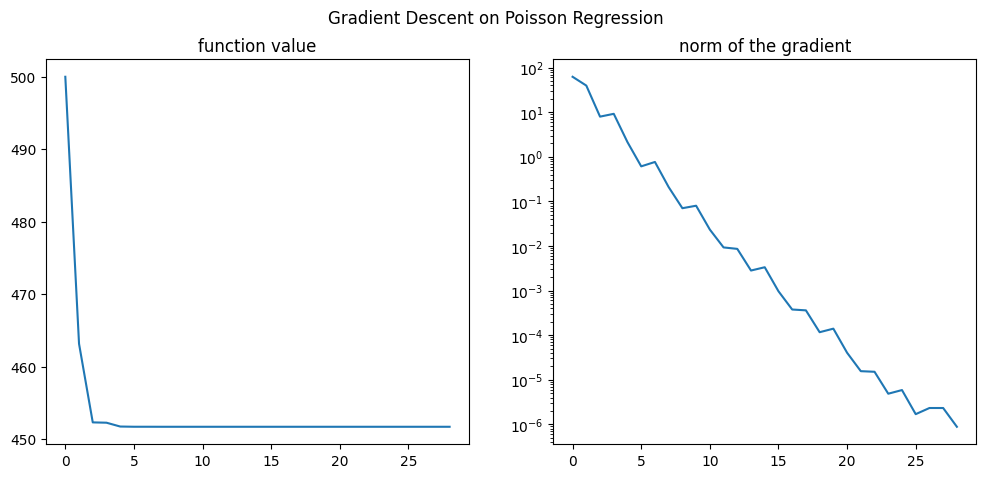

In [220]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(obj_his_psn_gd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_psn_gd)
ax[1].set_title('norm of the gradient')
fig.suptitle('Gradient Descent on Poisson Regression')

### Apply Newton's solver

In [221]:
x0_psn_nt = np.zeros(n_lgt)
#==GRADED==#
# No need to change anything in this cell.
x_psn_nt, obj_his_psn_nt, err_his_psn_nt, exit_flag_psn_nt = \
    optimizeWithNT(x0_psn_nt, psn_func, psn_grad, psn_hess)

Solution differences 1.551158600341128e-08


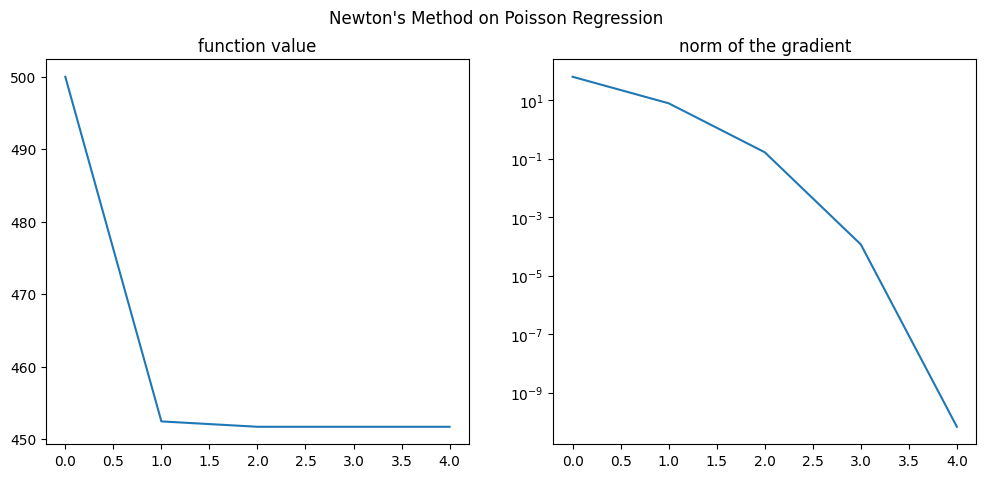

In [222]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(obj_his_psn_nt)
ax[0].set_title('function value')
ax[1].semilogy(err_his_psn_nt)
ax[1].set_title('norm of the gradient')
fig.suptitle('Newton\'s Method on Poisson Regression')
print("Solution differences",LA.norm(x_psn_gd - x_psn_nt,2))